<a href="https://colab.research.google.com/github/omkar806/on-device-experiments/blob/main/Emotion_Detection_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuring Kaggle Api to Download the dataset directly in **Colab**

In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                           Vehicle Sales Data                                  19MB  2024-02-21 20:16:17           4991         85  1.0              
devi5723/e-commerce-cosmetics-dataset                        E-commerce Cosmetic Products                         1MB  2024-02-28 14:46:12            655         24  0.9411765        
sazidthe1/world-gdp-growth                                   World GDP Growth                                    14KB  2024-02-25 11:37:58            780         22  1.0              
tarunrm09/climate-change-indicators                          Climate change Indi

In [6]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

100% 121M/121M [00:06<00:00, 25.1MB/s]
100% 121M/121M [00:06<00:00, 20.4MB/s]


# **Extracting and Loading the Dataset**

*Unzipping all the files*

In [7]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

*Installing the required libraries*

In [8]:
!pip install tensorflow keras opencv-python

In [12]:
#To remove an non empty folder in colab
!rm -rf "/content/images/images"

# Modelling Process

# *Importing required Libraries*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [2]:
picture_size = 48
folder_path = "/content/images/"

# *Displaying Images*

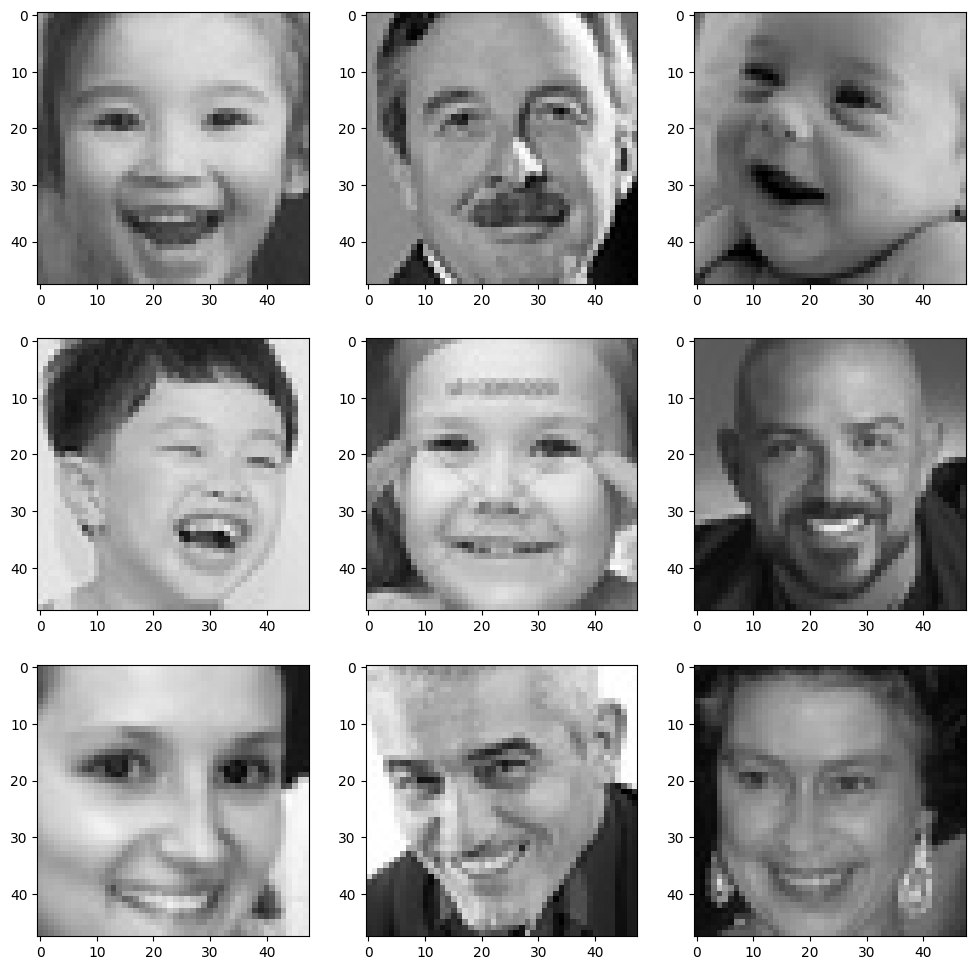

In [3]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

# *Making Training and Validation Data*

In [4]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


*Defining the 7 Labels*

# Model Building

In [5]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

# Fitting the Model with Training and Validation Data


In [6]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48
225/225 [==============================] - ETA: 0s - loss: 1.7775 - accuracy: 0.3218

225/225 [==============================] - 28s 78ms/step - loss: 1.7775 - accuracy: 0.3218 - val_loss: 2.2094 - val_accuracy: 0.2668 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.4374 - accuracy: 0.4496

225/225 [==============================] - 16s 70ms/step - loss: 1.4374 - accuracy: 0.4496 - val_loss: 1.4652 - val_accuracy: 0.4369 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.2757 - accuracy: 0.5121

225/225 [==============================] - 17s 73ms/step - loss: 1.2757 - accuracy: 0.5121 - val_loss: 1.3736 - val_accuracy: 0.4750 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - ETA: 0s - loss: 1.1900 - accuracy: 0.5445

225/225 [==============================] - 16s 71ms/step - loss: 1.1900 - accuracy: 0.5445 - val_loss: 1.6423 - val_accuracy: 0.4503 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - ETA: 0s - loss: 1.1310 - accuracy: 0.5691

225/225 [==============================] - 16s 71ms/step - loss: 1.1310 - accuracy: 0.5691 - val_loss: 1.2385 - val_accuracy: 0.5351 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - ETA: 0s - loss: 1.0803 - accuracy: 0.5912

225/225 [==============================] - 16s 73ms/step - loss: 1.0803 - accuracy: 0.5912 - val_loss: 1.1936 - val_accuracy: 0.5547 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - ETA: 0s - loss: 1.0364 - accuracy: 0.6101

225/225 [==============================] - 16s 71ms/step - loss: 1.0364 - accuracy: 0.6101 - val_loss: 1.1962 - val_accuracy: 0.5504 - lr: 0.0010
Epoch 8/48
225/225 [==============================] - ETA: 0s - loss: 0.9931 - accuracy: 0.6241

225/225 [==============================] - 17s 73ms/step - loss: 0.9931 - accuracy: 0.6241 - val_loss: 1.0980 - val_accuracy: 0.5872 - lr: 0.0010
Epoch 9/48
225/225 [==============================] - ETA: 0s - loss: 0.9477 - accuracy: 0.6440

225/225 [==============================] - 16s 70ms/step - loss: 0.9477 - accuracy: 0.6440 - val_loss: 1.2012 - val_accuracy: 0.5575 - lr: 0.0010
Epoch 10/48
225/225 [==============================] - ETA: 0s - loss: 0.9050 - accuracy: 0.6601

225/225 [==============================] - 16s 71ms/step - loss: 0.9050 - accuracy: 0.6601 - val_loss: 1.0943 - val_accuracy: 0.6021 - lr: 0.0010
Epoch 11/48
225/225 [==============================] - ETA: 0s - loss: 0.8659 - accuracy: 0.6733

225/225 [==============================] - 16s 70ms/step - loss: 0.8659 - accuracy: 0.6733 - val_loss: 1.1164 - val_accuracy: 0.5899 - lr: 0.0010
Epoch 12/48
225/225 [==============================] - ETA: 0s - loss: 0.8257 - accuracy: 0.6883

225/225 [==============================] - 16s 70ms/step - loss: 0.8257 - accuracy: 0.6883 - val_loss: 1.0727 - val_accuracy: 0.6159 - lr: 0.0010
Epoch 13/48
225/225 [==============================] - ETA: 0s - loss: 0.7833 - accuracy: 0.7066

225/225 [==============================] - 16s 71ms/step - loss: 0.7833 - accuracy: 0.7066 - val_loss: 1.0486 - val_accuracy: 0.6190 - lr: 0.0010
Epoch 14/48
225/225 [==============================] - ETA: 0s - loss: 0.7414 - accuracy: 0.7240

225/225 [==============================] - 16s 71ms/step - loss: 0.7414 - accuracy: 0.7240 - val_loss: 1.1131 - val_accuracy: 0.5955 - lr: 0.0010
Epoch 15/48
225/225 [==============================] - ETA: 0s - loss: 0.7010 - accuracy: 0.7356

225/225 [==============================] - 16s 70ms/step - loss: 0.7010 - accuracy: 0.7356 - val_loss: 1.3008 - val_accuracy: 0.5661 - lr: 0.0010
Epoch 16/48
225/225 [==============================] - ETA: 0s - loss: 0.6539 - accuracy: 0.7577Restoring model weights from the end of the best epoch: 13.



Epoch 16: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 [==============================] - 16s 72ms/step - loss: 0.6539 - accuracy: 0.7577 - val_loss: 1.1111 - val_accuracy: 0.6070 - lr: 0.0010
Epoch 16: early stopping


#Plotting Accuracy & Loss

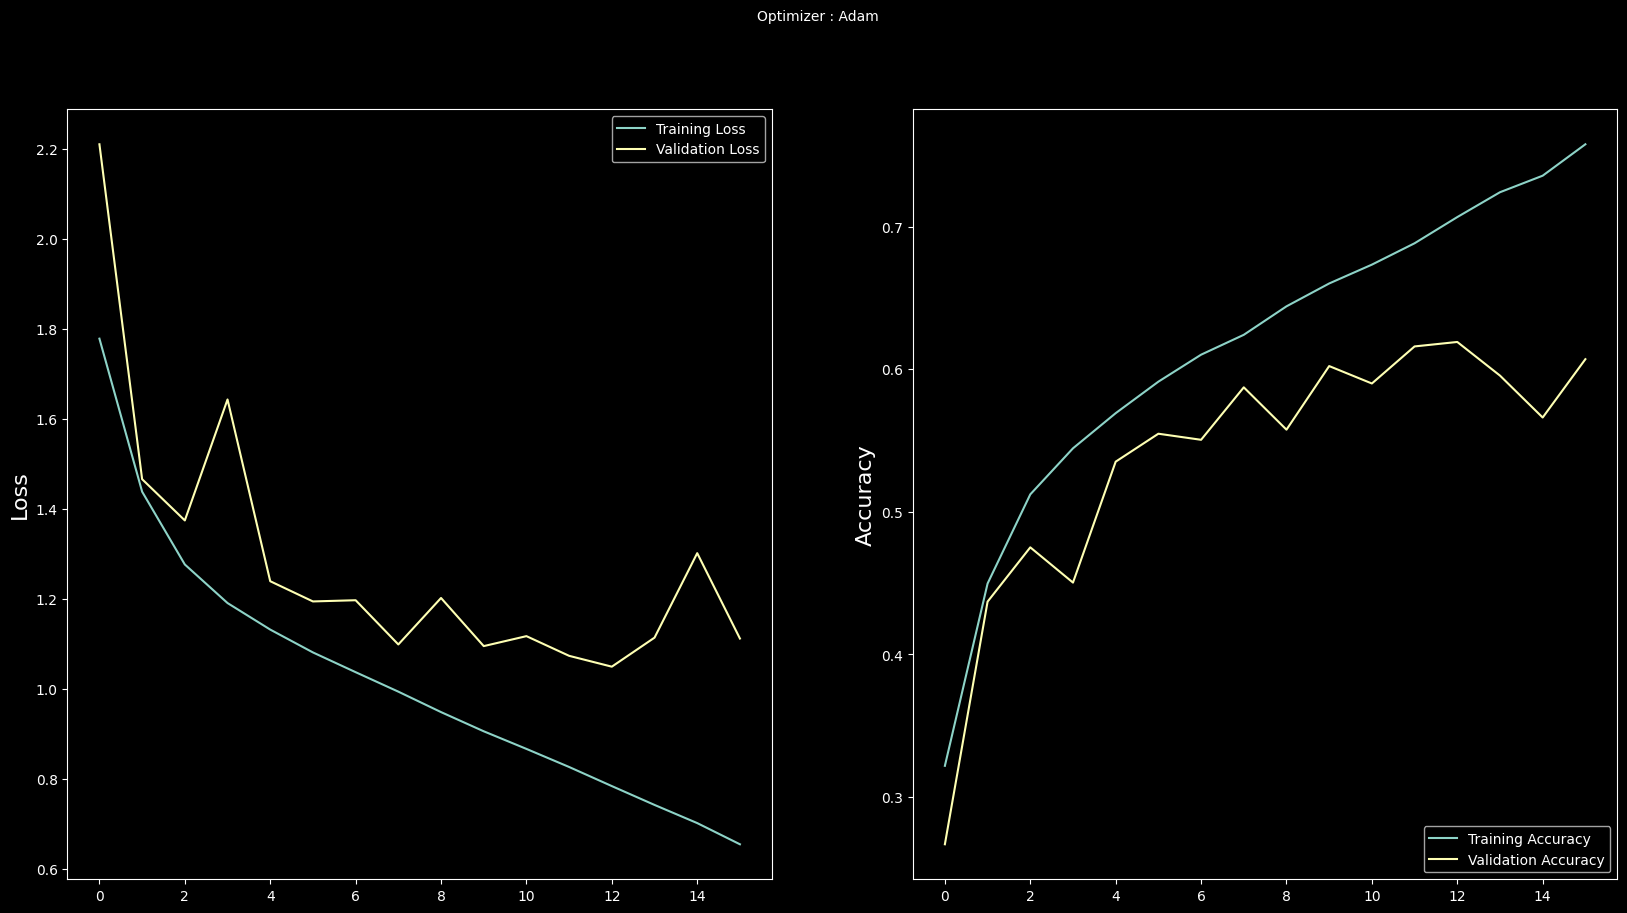

In [9]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [10]:
model.save('Emotion_Detection_Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
